#             I. Stat générales sur les séries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
import seaborn as sns

In [3]:
alternative_data_raw = pd.read_excel('EnsaeAlternativeTimeSeries.xlsx', sheet_name='Alternative Asset', index_col=0)

In [4]:
def tweak_alternative_data(df_):
    return (df_.assign(**{col + '_%': df_[col].pct_change(fill_method = None) for col in df_.columns}) #Adding the returs
            .set_index(pd.to_datetime(df_.index))
            .resample('QE')
            .last() #Changing the index format to datetime
            .rename(lambda c: c.replace(' ','_'), axis = 1)
            .drop(columns = ['Infrastructure_Equity_Listed_-_USD_Unhedged_%','Infrastructure_Equity_Listed_-_USD_Unhedged'])) # Replacing the spaces by _ in the names


alternative_data = tweak_alternative_data(alternative_data_raw)
alternative_return = alternative_data.iloc[:,8:]

/tmp/ipykernel_311364/1179806071.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .set_index(pd.to_datetime(df_.index))


In [5]:
alternative_return.head()

,Commodity_-_USD_Unhedged_%,Global_Property_USD_Unhedged_%,Hedge_Fund_DJ_-_USD_Unhedged_%,Infrastructure_Debt_-_USD_Unhedged_%,Infrastructure_Equity_USD_Unhedged_%,Nature_Capital_-_USD_Hedged_%,Private_Equity_USD_Unhedged_%,UK_Property_Direct_-_USD_Unhedged_%
QUARTER,,,,,,,,
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.101506,NaN
1994-06-30,NaN,NaN,NaN,NaN,NaN,NaN,0.029835,NaN
1994-09-30,NaN,NaN,NaN,NaN,NaN,NaN,0.036681,NaN
1994-12-31,NaN,NaN,NaN,NaN,NaN,NaN,0.001613,NaN


## Test de stationarité sur les rendements généraux:

Dickey Fuller : 

In [26]:
unit_test = {name: (adfuller(alternative_return[name].dropna())[0], adfuller(alternative_return[name].dropna())[1]) 
       for name in alternative_return.columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

,value,p-value
Commodity_-_USD_Unhedged_%,-8.82,0.00
Global_Property_USD_Unhedged_%,-8.58,0.00
Hedge_Fund_DJ_-_USD_Unhedged_%,-8.99,0.00
Infrastructure_Debt_-_USD_Unhedged_%,-7.14,0.00
Infrastructure_Equity_USD_Unhedged_%,-8.06,0.00
Nature_Capital_-_USD_Hedged_%,-5.63,0.00
Private_Equity_USD_Unhedged_%,-9.30,0.00
UK_Property_Direct_-_USD_Unhedged_%,-8.59,0.00


Test KPSS :

In [7]:
unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1]) 
       for name in alternative_data.iloc[:,10:].columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

/tmp/ipykernel_311364/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_311364/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_311364/3619417823.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(alternative_data[name].dropna())[0], kpss(alternative_data[name].dropna())[1])
/tmp/ipykernel_311364/3619417823.py:1: InterpolationWarning: The

,value,p-value
Hedge_Fund_DJ_-_USD_Unhedged_%,0.11,0.10
Infrastructure_Debt_-_USD_Unhedged_%,0.39,0.08
Infrastructure_Equity_USD_Unhedged_%,0.08,0.10
Nature_Capital_-_USD_Hedged_%,0.42,0.07
Private_Equity_USD_Unhedged_%,0.04,0.10
UK_Property_Direct_-_USD_Unhedged_%,0.08,0.10


# II. Stats sur les rendements observées de global property

In [8]:
global_returns = alternative_return['Global_Property_USD_Unhedged_%'].dropna()

In [9]:
global_returns

QUARTER
1999-06-30    0.097809
1999-09-30   -0.063888
1999-12-31    0.062225
2000-03-31   -0.024800
2000-06-30    0.036095
                ...   
2022-09-30   -0.113868
2022-12-31    0.071069
2023-03-31    0.010359
2023-06-30    0.005429
2023-09-30   -0.014102
Freq: QE-DEC, Name: Global_Property_USD_Unhedged_%, Length: 98, dtype: float64

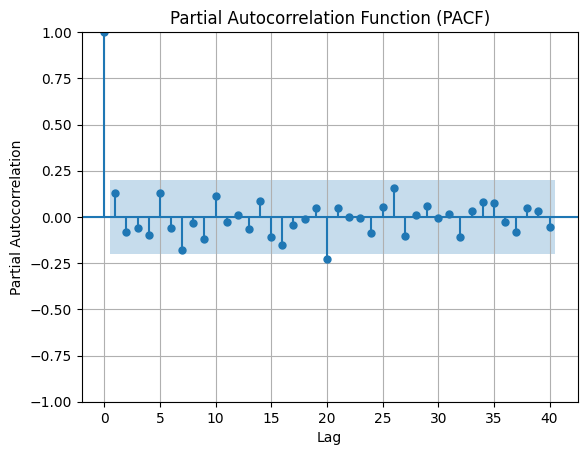

In [10]:
plot_pacf(global_returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

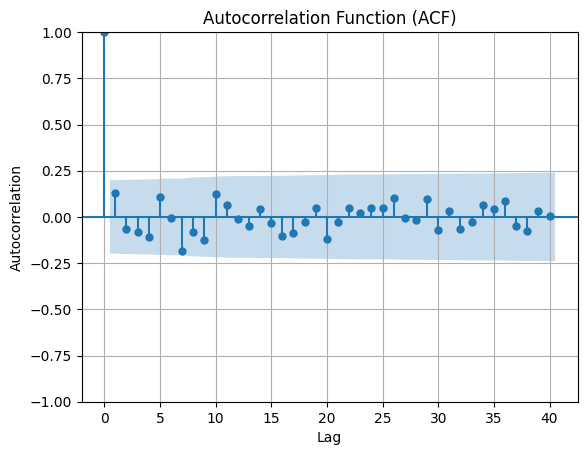

In [11]:
plot_acf(global_returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

## Autre stat pour vérif

In [12]:
returns = alternative_return['UK_Property_Direct_-_USD_Unhedged_%'].dropna()

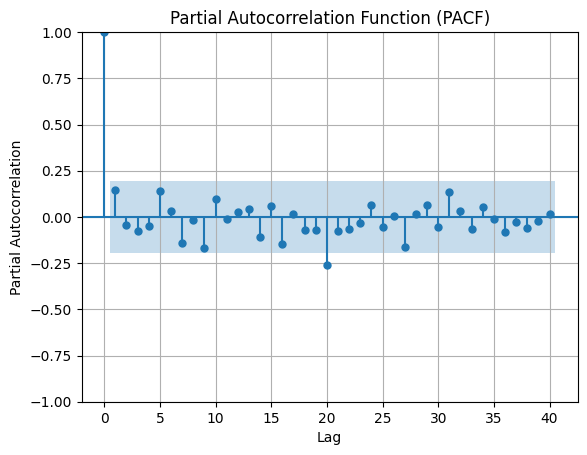

In [13]:
plot_pacf(returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

# II. Autres stat pour confirmer des trucs

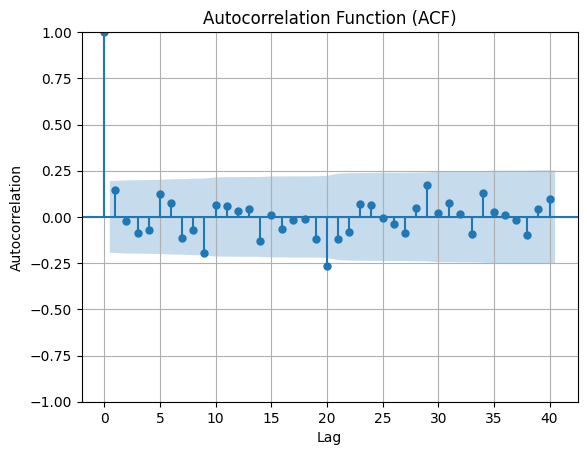

In [14]:
plot_acf(returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

## III test sur les séries délissées avec rebasage

In [15]:
unsmoothed = pd.read_csv('/home/perann/Bureau/ENSAE/STAT_APP/AR_Model/Ar_interpolated_data.csv', index_col=0)


### Stationarité

Dickey fuller

In [16]:
unit_test = {name: (adfuller(unsmoothed[name].dropna())[0], adfuller(unsmoothed[name].dropna())[1]) 
       for name in unsmoothed.columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

,value,p-value
Commodity_-_USD_Unhedged,-2.86,0.05
Global_Property_USD_Unhedged,-4.15,0.00
Hedge_Fund_DJ_-_USD_Unhedged,-4.36,0.00
Infrastructure_Debt_-_USD_Unhedged,-1.68,0.44
Infrastructure_Equity_USD_Unhedged,-1.98,0.30
Nature_Capital_-_USD_Hedged,-2.85,0.05
Private_Equity_USD_Unhedged,-4.02,0.00
UK_Property_Direct_-_USD_Unhedged,-4.16,0.00


In [17]:
unit_test = {name: (kpss(unsmoothed[name].dropna())[0], kpss(unsmoothed[name].dropna())[1]) 
       for name in unsmoothed.columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'RdYlGn'))

/tmp/ipykernel_311364/2886821878.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(unsmoothed[name].dropna())[0], kpss(unsmoothed[name].dropna())[1])
/tmp/ipykernel_311364/2886821878.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(unsmoothed[name].dropna())[0], kpss(unsmoothed[name].dropna())[1])
/tmp/ipykernel_311364/2886821878.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  unit_test = {name: (kpss(unsmoothed[name].dropna())[0], kpss(unsmoothed[name].dropna())[1])
/tmp/ipykernel_311364/2886821878.py:1: InterpolationWarning: The test statistic is outside of the ra

,value,p-value
Commodity_-_USD_Unhedged,0.10,0.10
Global_Property_USD_Unhedged,0.06,0.10
Hedge_Fund_DJ_-_USD_Unhedged,0.06,0.10
Infrastructure_Debt_-_USD_Unhedged,0.47,0.05
Infrastructure_Equity_USD_Unhedged,0.10,0.10
Nature_Capital_-_USD_Hedged,0.19,0.10
Private_Equity_USD_Unhedged,0.04,0.10
UK_Property_Direct_-_USD_Unhedged,0.05,0.10


### Modèle AR sur global prop

In [42]:
returns = unsmoothed['Global_Property_USD_Unhedged'].dropna()
returns.index = pd.to_datetime(returns.index)

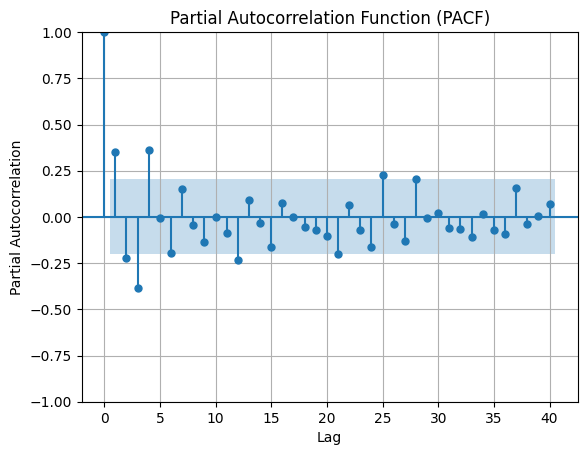

In [43]:
plot_pacf(returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

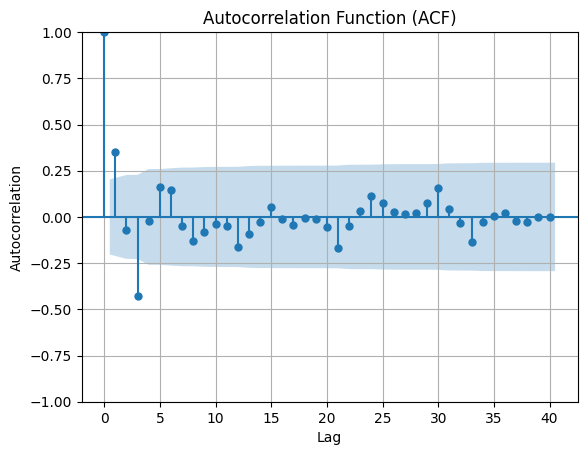

In [44]:
plot_acf(returns, lags = 40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

p_{max} = 4, 
q_{max} =  3

In [49]:
from statsmodels.tsa.arima.model  import ARIMA
model_list = []
model43 = ARIMA(returns, order = (4,0,3))
model42 = ARIMA(returns, order = (4,0,2))
model41 = ARIMA(returns, order = (4,0,1))
model40 = ARIMA(returns, order = (4,0,0))
model33 = ARIMA(returns, order = (3,0,3))
model32 = ARIMA(returns, order = (3,0,2))
model31 = ARIMA(returns, order = (3,0,1))
model30 = ARIMA(returns, order = (3,0,0))
model23 = ARIMA(returns, order = (2,0,3))
model22 = ARIMA(returns, order = (2,0,2))
model21 = ARIMA(returns, order = (2,0,1))
model20 = ARIMA(returns, order = (2,0,0))
model13 = ARIMA(returns, order = (1,0,3))
model12 = ARIMA(returns, order = (1,0,2))
model11 = ARIMA(returns, order = (1,0,1))
model10 = ARIMA(returns, order = (1,0,0))
model_list = [model43,model42,model41,model40,model33,model32,model31,model30,model23,model22,model21,model20,model13,model12,model11,model10]

/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
D = {}
for model in model_list:
    residuals = model.fit().resid
    lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=12)
    D[str(model)] = [lb_test_stat, lb_p_value]

Result = pd.DataFrame(D)
Result

/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/perann/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/perann/miniconda3/l

,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9eb29670>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9f004830>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9df03800>,<statsmodels.tsa.arima.model.ARIMA object at 0x779da123b590>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9ca9a3c0>,<statsmodels.tsa.arima.model.ARIMA object at 0x779da12ad550>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9cab4200>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9edc3e60>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9e2dcad0>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9e2dc2f0>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9ebb7710>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9ca99fa0>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9ebb5ac0>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9ec76c00>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9c9ff410>,<statsmodels.tsa.arima.model.ARIMA object at 0x779d9c9fb4a0>
0,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat,lb_stat
1,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue,lb_pvalue
